In [1]:
#Deep Learning with Keras & tensorflow
#image recognition
%matplotlib inline
#call all the required libraries
import numpy as np #math lib
import matplotlib.pyplot as plt #plotting
import matplotlib.image as mpimg
import random # generate random numbers

import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist #call the mnist data set
#from keras.datasets import mnist
from tensorflow.keras.models import Sequential # type of model to be used
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils # tools related to numpy
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#Find the shape of the data
train_images.shape

(60000, 28, 28)

In [4]:
#Label or class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#Find length of training & test
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

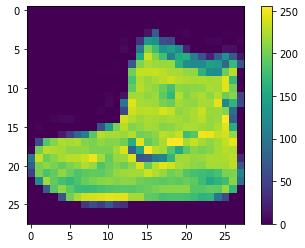

In [9]:
#plot the data or images
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

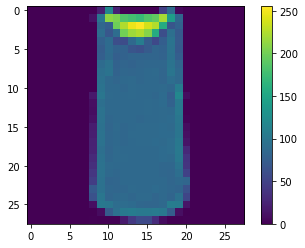

In [10]:
#plot the data or images
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
#Normalize the data
train_images = train_images / 255

test_images = test_images / 255

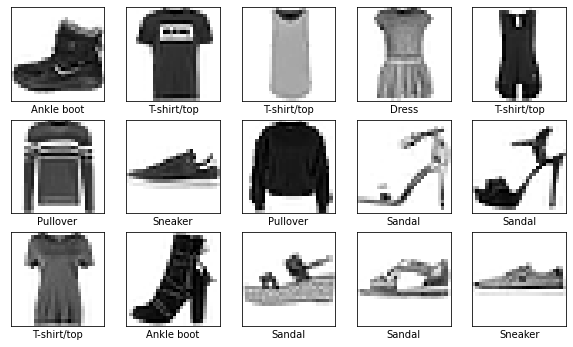

In [12]:
#plot again
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

In [13]:
#Model Build Up
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [14]:
#Compile the Model
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [15]:
#How to train the Model
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 1ms/step - loss: 0.6244 - accuracy: 0.7834
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3783 - accuracy: 0.8611
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3348 - accuracy: 0.8781
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3107 - accuracy: 0.8838
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3002 - accuracy: 0.8901
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2776 - accuracy: 0.8971
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9004
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2546 - accuracy: 0.9048
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2424 - accuracy: 0.9095
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

In [20]:
#Evaluate the Accuracy
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
probability_model =tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]
test_labels[0]

313/313 - 0s - loss: 1.5976 - accuracy: 0.8839

Test accuracy: 0.883899986743927


9